In [6]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

import os
print(os.listdir("./input"))

import warnings
warnings.filterwarnings(action="ignore")

['creditcard.csv']


In [8]:
data = pd.read_csv("./input/creditcard.csv")

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
data['Amount'].value_counts().sum()

284807

In [12]:
corr = data.corr()
corr['Class'].sort_values(ascending=False).head(12)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
Name: Class, dtype: float64

In [13]:
corr = data.corr()
corr['Class'].sort_values(ascending=True).head(12)

V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
V7    -0.187257
V18   -0.111485
V1    -0.101347
V9    -0.097733
V5    -0.094974
V6    -0.043643
Name: Class, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [15]:
print(train_set.shape, test_set.shape)

(227845, 31) (56962, 31)


In [16]:
train_labels = train_set["Class"].copy()
train = train_set.drop("Class", axis=1).copy()
test_labels = test_set["Class"].copy()
test = test_set.drop("Class", axis=1).copy()

In [17]:
print(train.shape, test.shape)

(227845, 30) (56962, 30)


In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
import time
from sklearn.model_selection import cross_val_score

def classification_model(model, X_train, y_train):
    #Fit the model:
    time_start = time.perf_counter() #start counting the time
    model.fit(X_train,y_train)
    n_cache = []
    
    train_predictions = model.predict(X_train)
    precision = precision_score(y_train, train_predictions)
    recall = recall_score(y_train, train_predictions)
    f1 = f1_score(y_train, train_predictions)
    
    print("Precision ", precision)
    print("Recall ", recall)
    print("F1 score ", f1)
    
    cr_val = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
    
    time_end = time.perf_counter()
    
    total_time = time_end-time_start
    print("Cross Validation Score: %f" %np.mean(cr_val))
    print("Amount of time spent during training the model and cross validation: %4.3f seconds" % (total_time))

# LGBM

- GOSS(Gradient-based One-Side Sampling)를 메인 기술로 사용
- Information gain을 계산할 때 기울기가 작은(가중치가 작은)개체에 승수 상수를 적용하여 데이터를 증폭
- leaf-wise(리프 중심 트리 분할) -> 트리가 깊어지면서 소요되는 시간과 메모리 모두를 절약

In [19]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="liblinear")
classification_model(log_reg, train,train_labels)

Precision  0.8709677419354839
Recall  0.616751269035533
F1 score  0.7221396731054979
Cross Validation Score: 0.619344
Amount of time spent during training the model and cross validation: 28.882 seconds


In [42]:
log_reg

LogisticRegression(solver='liblinear')

In [28]:
from sklearn.model_selection import cross_val_predict

test_predictions = log_reg.predict(test)
precision = precision_score(test_labels, test_predictions)
recall = recall_score(test_labels, test_predictions)
f1 = f1_score(test_labels, test_predictions)
y_scores = log_reg.predict_proba

cross_value = cross_val_score(log_reg,test,test_labels ,cv=5, scoring='recall')

y_probas_lgbm = cross_val_predict(log_reg, test, test_labels, cv=3,
                                    method="predict_proba")

y_scores_lgbm = y_probas_lgbm[:, 1]

In [29]:
from sklearn.metrics import roc_auc_score

print("Precision ", precision)
print("Recall ", recall)
print("F1 score ", f1)
print("Cross Validation Score: %f" %np.mean(cross_value))
print("ROC AUC score: ", roc_auc_score(test_labels, y_scores_lgbm))

Precision  0.8253968253968254
Recall  0.5306122448979592
F1 score  0.6459627329192548
Cross Validation Score: 0.591579
ROC AUC score:  0.9326071945379164


# Xgboost

- XGBoost는 기본적으로 GBM과 같이 decision Tree의 앙상블 모형
- 병렬 처리 지원
- 과적합 방지가 잘되어있다
- 예측 성능이 매우좋다

In [24]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(train, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

- default 파라미터

In [30]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

cmat, pred = RunModel(xg, train, train_labels, test, test_labels)

In [36]:
accuracy_score(test_labels, pred)

0.9996313331694814

In [37]:
print (classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



# Decision Tree

- 직관적인 해석 가능
- 주요 변수와 분리기준 제시
- 과대적합 발생률 높음(가지치기 필요)

In [38]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth=4)
classifier.fit(train, train_labels)
predicted=classifier.predict(test)
print("\n Predicted value:\n",predicted)


 Predicted value:
 [1 0 0 ... 0 0 0]


In [43]:
classifier

DecisionTreeClassifier(max_depth=4)

In [39]:
from sklearn import metrics
DecisionTree= metrics.accuracy_score(test_labels, predicted) * 100
print("\n The Accuracy Score Using Algorithm Decision Tree Classifier: ", DecisionTree)


 The Accuracy Score Using Algorithm Decision Tree Classifier:  99.9438221972543


In [41]:
print (classification_report(test_labels, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.81      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



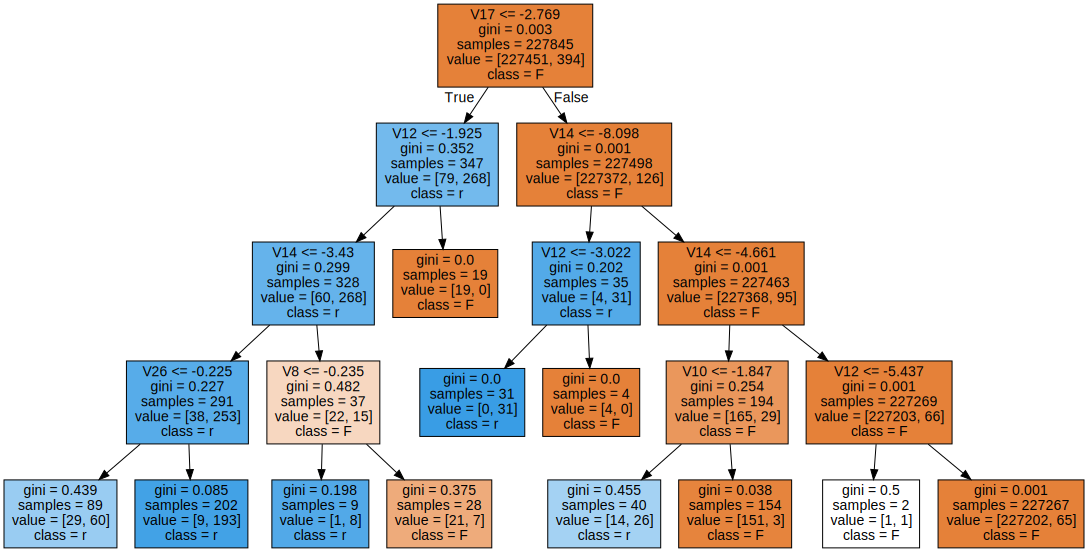

In [48]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(classifier, out_file=None, 
                                feature_names=train.columns,  
                                class_names='Fraud',
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph